In [1]:
import pandas as pd
df=pd.read_csv('train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [2]:
data=df.values[:,1:8]
class_labels=df.values[:,8]
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(data, class_labels, test_size = 0.30)
X_train=X_train.astype(int)
X_test=X_test.astype(int)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import math
acct=[]
acc=[]
Cval=[]
for j in range(-3,4):
    i=math.pow(2,j)
    clf = SVC(C=i, gamma='auto', kernel='rbf')
    clf.fit(X_train, y_train)
    y_predt = clf.predict(X_test)
    y_pred=clf.predict(X_train)
    train_accuracy=accuracy_score(y_train,y_pred)
    test_accuracy=accuracy_score(y_test,y_predt)
    acct.append(test_accuracy)
    acc.append(train_accuracy)
    Cval.append(i)

In [3]:
import matplotlib.pyplot as plt
x=Cval
yt=acct
y=acc
plt.plot(x,yt,color='r',label="test acc")
plt.plot(x,y,color='b',label="train acc")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

SVM:  0.7368229734641947
Decision Tree:  0.7455470737913485
Logistic Regression:  0.7964376590330788
Boosting:  0.7811704834605598


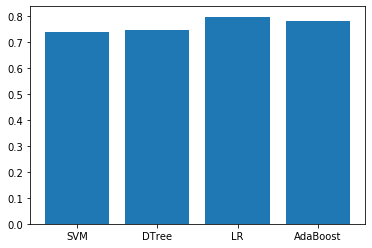

In [4]:
#SVM
acc1=sum(acct)/len(acct)
print("SVM: ",acc1)

#OTHER CLASSIFIERS

#DECISION TREE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0)  #gini index criterion
#cross_val_score(clf2, X_train, y_train, cv=5)
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)
acc2=accuracy_score(y_test,y_pred2)
print("Decision Tree: ",acc2)

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression(random_state=0, solver='liblinear').fit(X_train, y_train)
y_pred3=clf3.predict(X_test)
acc3=accuracy_score(y_test,y_pred3)
print("Logistic Regression: ",acc3)

#BOOSTING
from sklearn.ensemble import AdaBoostClassifier
clf4 = AdaBoostClassifier(n_estimators=100)
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)
acc4=accuracy_score(y_test,y_pred4)
print("Boosting: ",acc4)

#plot
oacc=[acc1,acc2,acc3,acc4]
plt.bar([1,2,3,4],height=oacc)
plt.xticks([1.0,2.0,3.0,4.0],["SVM","DTree","LR","AdaBoost"])
plt.show()

In [5]:
#FOREST COVER TYPE DATASET
dat=pd.read_csv('covtype.csv')
print(dat.shape)

(581012, 55)


In [6]:
dat.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
dat=dat.dropna()
fdat=dat.values
print(fdat.shape)

(581012, 55)


In [8]:
import random as r
r.shuffle(fdat)
fdata=fdat[:,0:54]
fclass=fdat[:,54]
from sklearn.model_selection import train_test_split
training_d,testing_d,training_c,testing_c=train_test_split(fdata,fclass,test_size=0.30)
training_d,validate_d,training_c,validate_c=train_test_split(training_d,training_c,test_size=0.20)
training_d=training_d[0:3253,:]
training_c=training_c[0:3253]
testing_d=testing_d[0:1743,:]
testing_c=testing_c[0:1743]
print("Train:",training_d.shape[0])
print("Test:",testing_d.shape[0])
print("Validate:",validate_d.shape[0])

Train: 3253
Test: 1743
Validate: 81342


In [9]:
training_c.shape

(3253,)

In [10]:
"""
v1=int(training_d.shape[0]/1000)
v2=int(testing_d.shape[0]/1000)
trd=training_d[0:3253,:]
trc=training_c[0:3253,:]
tsd=testing_d[0:1743,:]
tsc=testing_c[0:1743,:]
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
para = {'C':[1,100], 'gamma':[1,10]}
psvc = svm.SVC(gamma='scale',kernel='rbf')
GridSearchCV(psvc, para, cv=10)
svc.fit(trd,trc)
py_pred = svc.predict(tsd)
paccuracy=accuracy_score(tsc,py_pred)
print(paccuracy)
"""

"\nv1=int(training_d.shape[0]/1000)\nv2=int(testing_d.shape[0]/1000)\ntrd=training_d[0:3253,:]\ntrc=training_c[0:3253,:]\ntsd=testing_d[0:1743,:]\ntsc=testing_c[0:1743,:]\nfrom sklearn import svm\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\npara = {'C':[1,100], 'gamma':[1,10]}\npsvc = svm.SVC(gamma='scale',kernel='rbf')\nGridSearchCV(psvc, para, cv=10)\nsvc.fit(trd,trc)\npy_pred = svc.predict(tsd)\npaccuracy=accuracy_score(tsc,py_pred)\nprint(paccuracy)\n"

In [11]:

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
parameters = {'C':[1,100], 'gamma':[1,10]}
svc = svm.SVC(gamma='scale',kernel='rbf')
GridSearchCV(svc, parameters, cv=10)
svc.fit(training_d,training_c)
y_predf = svc.predict(testing_d)
accuracy=accuracy_score(testing_c,y_predf)
print(accuracy)


0.6919104991394148


In [12]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[252 245   0   0   0   0   0]
 [ 54 899   3   0   0   0   0]
 [  0  40  55   0   0   0   0]
 [  0   4  22   0   0   0   0]
 [  0  55   0   0   0   0   0]
 [  0  45  24   0   0   0   0]
 [ 43   2   0   0   0   0   0]]


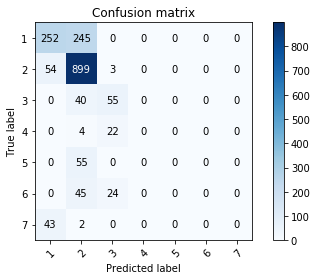

In [13]:
import numpy as np
np.set_printoptions(precision=2)
#Plot non-normalized confusion matrix
plot_confusion_matrix(testing_c.astype(int), y_predf.astype(int), classes=np.array(['1','2','3','4','5','6','7']),title='Confusion matrix')
